<img src="https://s3.amazonaws.com/datascienceheroes.com/EDV/360_banner_python.png" width="400px">


# Escuela de Datos Vivos 

## LAB P.D.3.3: Discretización de variables
Creado por Pablo Casas | https://escueladedatosvivos.ai   

Resuelto por Pablo Sotomayor

## Ejercicios

1) Cargar datos: `eph_tr=pd.read_csv("data/eph_tr.csv", sep = ";")`

2) Discretizar variable `ingreso`, con 3, 5 y 15 bins/segmentos, por igual frecuencia. Observar las diferencias con un gráfico de barra. Observar como cambia la silueta en cada caso.

3) De nuevo, discretizar la variable `ingreso`, 5 bins/segmentos, por igual distancia. Comparar con freq_tbl() con respecto al de 5 bins del punto 2).

## Solución

In [1]:
# Librerías que utilizaremos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from funpymodeling.exploratory import freq_tbl, status, profiling_num

#### 1) Carga de datos

In [2]:
eph_tr = pd.read_csv("../data/eph_tr.csv", sep=";")   # Encuesta permanente de hogares

print(f"Cantidad de registros: {eph_tr.shape[0]}")
print(f"Cantidad de variables: {eph_tr.shape[1]}")

Cantidad de registros: 2461
Cantidad de variables: 8


Inspeccionamos los datos tomando una muestra aleatoria de ellos.

In [3]:
eph_tr.sample(5)

,edad,sexo,alfabeto,sistema_salud,nivel_educativo,ocupacion_jerarquia,estado_civil,ingreso
1188,51,mujer,Si,No paga ni le descuentan,Secundaria Completa,Cuenta propia,2,8000
1310,30,hombre,Si,No paga ni le descuentan,Secundaria Completa,Cuenta propia,4,10000
2315,55,mujer,Si,No paga ni le descuentan,Secundaria Incompleta,Cuenta propia,1,3000
352,39,mujer,Si,No paga ni le descuentan,Secundaria Incompleta,Cuenta propia,3,18000
1451,43,mujer,Si,Obra social (incluye PAMI),Superior Universitaria Completa,Cuenta propia,3,40000


Revisamos el estado de los datos

In [4]:
status(eph_tr).sort_values(by=["type", "unique"], ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
3,sistema_salud,0,0.0,0,0.0,7,object
4,nivel_educativo,0,0.0,0,0.0,7,object
5,ocupacion_jerarquia,0,0.0,0,0.0,4,object
1,sexo,0,0.0,0,0.0,2,object
2,alfabeto,0,0.0,0,0.0,2,object
7,ingreso,0,0.0,0,0.0,111,int64
0,edad,0,0.0,0,0.0,69,int64
6,estado_civil,0,0.0,0,0.0,5,int64


Vemos que no hay ceros ni nulos, ni variables categóricas de alta cardinalidad. La variable estado_civil aparece como variable numérica, aunque es categórica.

In [5]:
eph_tr['estado_civil'] = eph_tr['estado_civil'].astype('str')

Volvemos a revisar el estado

In [6]:
status(eph_tr).sort_values(by=["type", "unique"], ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
3,sistema_salud,0,0.0,0,0.0,7,object
4,nivel_educativo,0,0.0,0,0.0,7,object
6,estado_civil,0,0.0,0,0.0,5,object
5,ocupacion_jerarquia,0,0.0,0,0.0,4,object
1,sexo,0,0.0,0,0.0,2,object
2,alfabeto,0,0.0,0,0.0,2,object
7,ingreso,0,0.0,0,0.0,111,int64
0,edad,0,0.0,0,0.0,69,int64


#### 2) Discretizamos variable ingreso

Seleccionamos la variable a predecir

In [7]:
ingreso_tr = eph_tr['ingreso']

Discretizamos la variable con 3 bins por igual frecuencia

In [8]:
ingreso_tr_3, bins3 = pd.qcut(ingreso_tr, q=3, retbins=True)

Inspeccionamos la variable discretizada

In [9]:
status(ingreso_tr_3)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ingreso,0,0.0,0,0.0,3,category


In [10]:
ingreso_tr_3

0       (15000.0, 158000.0]
1       (15000.0, 158000.0]
2          (99.999, 6000.0]
3         (6000.0, 15000.0]
4       (15000.0, 158000.0]
               ...         
2456      (6000.0, 15000.0]
2457      (6000.0, 15000.0]
2458       (99.999, 6000.0]
2459       (99.999, 6000.0]
2460    (15000.0, 158000.0]
Name: ingreso, Length: 2461, dtype: category
Categories (3, interval[float64]): [(99.999, 6000.0] < (6000.0, 15000.0] < (15000.0, 158000.0]]

Vemos que se ha discretizado la variable en 3 intervalos. Revisamos cuantos valores hay en cada intervalo

In [11]:
ingreso_tr_3.value_counts()

(6000.0, 15000.0]      937
(99.999, 6000.0]       854
(15000.0, 158000.0]    670
Name: ingreso, dtype: int64

Los 3 intervalos tienen similar cantidad de datos.

In [12]:
freq_tbl(ingreso_tr_3)

,ingreso,frequency,percentage,cumulative_perc
0,"(6000.0, 15000.0]",937,0.380740,0.380740
1,"(99.999, 6000.0]",854,0.347013,0.727753
2,"(15000.0, 158000.0]",670,0.272247,1.000000


Repetimos para un bineado de 5 y de 15

In [13]:
ingreso_tr_5, bins5 = pd.qcut(ingreso_tr, q=5, retbins=True)

In [14]:
ingreso_tr_15, bins15 = pd.qcut(ingreso_tr, q=15, retbins=True)

Graficamos los resultados obtenidos

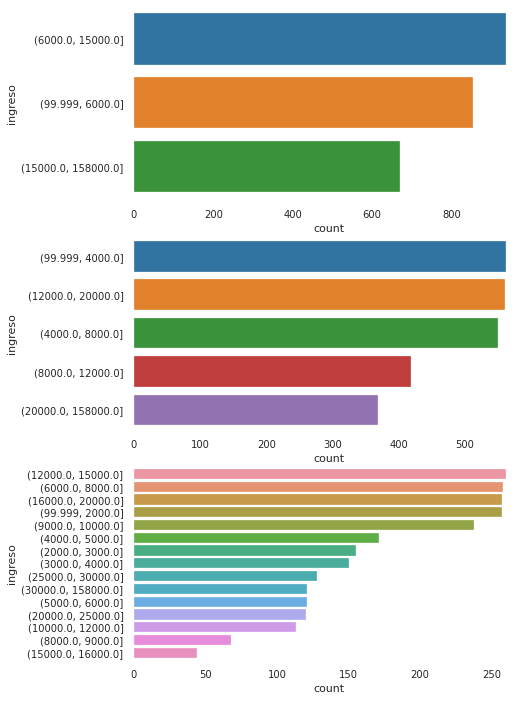

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(7,12))
sns.countplot(y=ingreso_tr_3, order = ingreso_tr_3.value_counts().index, ax=axs[0])
sns.countplot(y=ingreso_tr_5, order = ingreso_tr_5.value_counts().index, ax = axs[1])
sns.countplot(y=ingreso_tr_15, order = ingreso_tr_15.value_counts().index, ax=axs[2])
plt.show()

En el gráfico se aprecia en que bines caen la mayor cantidad de eventos para cada caso estudiado.

#### 3) Discretizamos en segmento de igual tamaño con 5 bines

In [16]:
ingreso_tr_eqrange  = pd.cut(ingreso_tr, bins=5)

Inspeccionamos la discretización realizada

In [17]:
freq_tbl(ingreso_tr_eqrange)

,ingreso,frequency,percentage,cumulative_perc
0,"(-57.9, 31680.0]",2340,0.950833,0.950833
1,"(31680.0, 63260.0]",106,0.043072,0.993905
2,"(63260.0, 94840.0]",9,0.003657,0.997562
3,"(94840.0, 126420.0]",5,0.002032,0.999594
4,"(126420.0, 158000.0]",1,0.000406,1.000000


Vemos que la mayor cantidad de datos corresponden al primer intervalo. Notar que el extremo inferior del primer intervalo toma valores imposibles.

Graficamos lo obtenido y comparamos con el bineado de igual frecuencia.

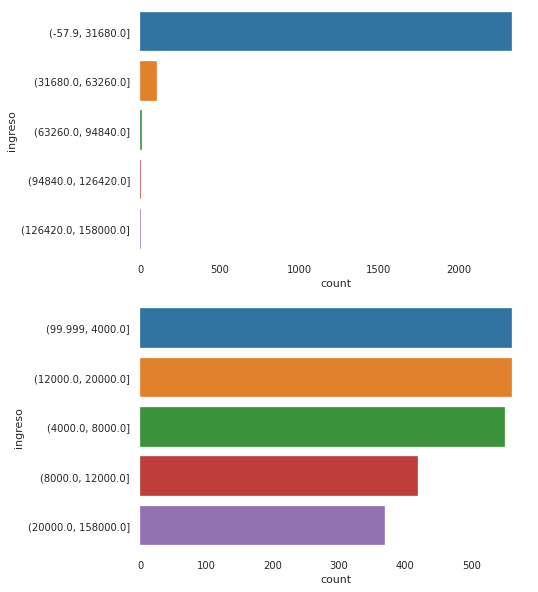

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(7,10))
sns.countplot(y=ingreso_tr_eqrange, order = ingreso_tr_eqrange.value_counts().index, ax=axs[0])
sns.countplot(y=ingreso_tr_5, order = ingreso_tr_5.value_counts().index, ax = axs[1])
plt.show()

El bineado de igual frecuencia es el más empleado para el trabajo en ciencia de datos, pues las clases están balanceadas.